# **BT thực hành 1.5: Nhận dạng chữ số viết tay** (*Optical Character Recognition* - *OCR*)

> Cập nhật: **07/2023**



In [1]:
## Thư viện
import numpy             as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from numpy.linalg        import norm
from sklearn             import datasets


## Đọc dữ liệu mẫu chữ viết tay

In [2]:
## Đọc các mẫu (samples) hình ảnh của các chữ số viết tay từ thư viện sklearn
data   = datasets.load_digits()
images = data.images # hình ảnh các mẫu
labels = data.target # nhãn phân loại các mẫu

In [3]:
## Số lượng mẫu (1797)
labels.shape

(1797,)

In [4]:
## Kích thước của mỗi mẫu: ma trận 8 x 8
images.shape

(1797, 8, 8)

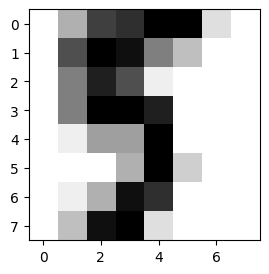

In [5]:
## Xem mẫu hình ảnh
idx = 15 # chọn tùy ý
img = images[idx]
plt.figure(figsize = (3, 3))
plt.imshow(img, cmap = plt.cm.gray_r)
plt.show()

In [6]:
## Ma trận biểu diễn ảnh (trắng đen: a[i] = 0..16)
img

array([[ 0.,  5., 12., 13., 16., 16.,  2.,  0.],
       [ 0., 11., 16., 15.,  8.,  4.,  0.,  0.],
       [ 0.,  8., 14., 11.,  1.,  0.,  0.,  0.],
       [ 0.,  8., 16., 16., 14.,  0.,  0.,  0.],
       [ 0.,  1.,  6.,  6., 16.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
       [ 0.,  1.,  5., 15., 13.,  0.,  0.,  0.],
       [ 0.,  4., 15., 16.,  2.,  0.,  0.,  0.]])

In [7]:
## Nhãn phân loại (label / target) của mẫu hình ảnh thứ idx
print('Mẫu ảnh là chữ viết tay của số', labels[idx])

Mẫu ảnh là chữ viết tay của số 5


---
## **Yêu cầu 1: Tạo ma trận A, có các dòng là vector (có 64 phần tử = 8 x 8)**
---


In [8]:
## Kich thước của ma trận mẫu ảnh (8 x 8) ==> định dạng lại thành vector có 64 cột
lst = []
for img in images:
    lst.append(img.reshape(64).tolist())
A = np.array(lst)

In [9]:
A.shape

(1797, 64)

In [ ]:
A[idx]

array([ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8.,
        4.,  0.,  0.,  0.,  8., 14., 11.,  1.,  0.,  0.,  0.,  0.,  8.,
       16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6., 16.,  0.,  0.,
        0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15.,
       13.,  0.,  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.])

In [10]:
## Hàm tính khoảng cách từ 1 vector đến từng dòng của ma trận
def Distance(A, v):
    A_v       = (A - v)
    distances = []
    for i in range(A_v.shape[0]):
        distances.append(norm(A_v[i, :]))
    return np.array(distances)

## Hàm tìm k láng giềng gần nhất với v (ngầm định k = 3)
def KNN(A, v, k = 3):
    # Khoảng cách từ v đến ma trận A
    distances = Distance(A, v)

    # Tạo 2 arrays: index và distance
    D1 = np.arange(distances.shape[0])
    D  = np.c_[D1, distances] # Ghép nối theo CỘT để tạo ma trận có 2 cột (numpy.r_ : ghép nối theo DÒNG)
    D  = D[np.argsort(D[:, 1])][:k] # sắp xếp tăng dần theo distance và chọn k phần tử có distance nhỏ nhất
    return (D[:,0], D[:,1]) # trả về 2 array: index, distance

---
## **Yêu cầu 2:**
- Tạo vector v là mẫu hình tại vị trí 4 (index = 4); v có kích thước 64
- Gọi hàm: idx, dist = KNN(A, v) với A là ma trận vừa tạo
- In ra idx và dist
- In ra labels[*idx*] và cho nhận xét
---


In [11]:
## Mẫu hình ảnh ở vị trí thứ idx
idx   = 4
image = images[idx]
v     = image.reshape(image.size)

In [12]:
## Chọn 3 (ngầm định) mẫu gần v nhất
idx, dist = KNN(A, v)

In [13]:
## Index của các phần tử gần vector v nhất
idx.astype(int)

array([   4, 1777,  100])

In [14]:
## Khoảng cách tương ứng
dist

array([ 0.        , 18.43908891, 21.70253441])

In [15]:
## Các nhãn phân loại (label / target) của mẫu
labels[idx.astype(int)]

array([4, 4, 4])